In [1]:
import arcpy

In [2]:
arcpy.env.workspace = r'C:\Users\thindle2016\OneDrive - Liberty University\geog650\data'
arcpy.env.overwriteOutput = True

In [3]:
r = arcpy.Raster('VA_LUCampus_NAIP_Multispectral_20231013.tif')

print(r.spatialReference.name)
print(f'Dimensions: {r.height}, {r.width}, {r.bandCount}')
print(f'Cell size: {r.meanCellHeight:.2f} x {r.meanCellWidth:.2f}')
print(f'Unit: {r.spatialReference.linearUnitName}')
print(r.bandNames)

NAD_1983_UTM_Zone_17N
Dimensions: 5661, 4423, 4
Cell size: 0.60 x 0.60
Unit: Meter
['Band_1', 'Band_2', 'Band_3', 'Band_4']


In [4]:
# Unpacking the list into four variables
red, green, blue, nir = r.getRasterBands()

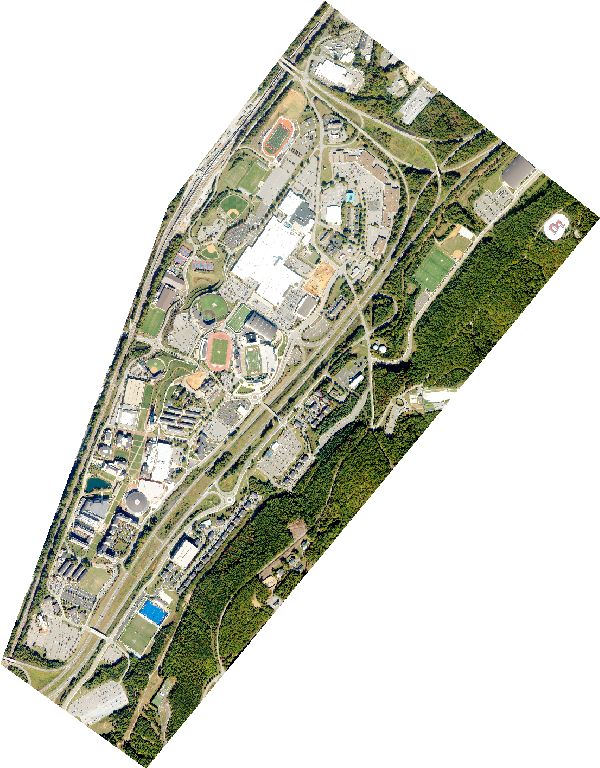

In [5]:
rgb = arcpy.management.CompositeBands([red, green, blue], 'rgb_composite.tif')
rgb = arcpy.Raster(rgb)
rgb

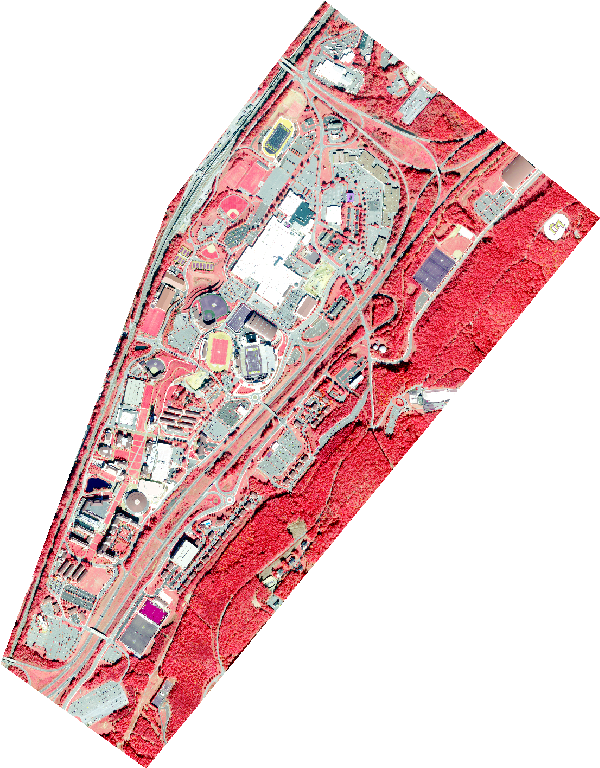

In [6]:
cir = arcpy.management.CompositeBands([nir, red, green], 'cir_composite.tif')
cir = arcpy.Raster(cir)
cir

In [7]:
def calculate_vegetation_index(nir_band, red_band):
    '''Calculates the Normalized Difference Vegetation Index (NDVI) and
    outputs values from -1.0 to 1.0 used to quantify vegetation greenness
    for understanding its density and health'''

    ndvi = (nir - red) / (nir + red)
    return ndvi

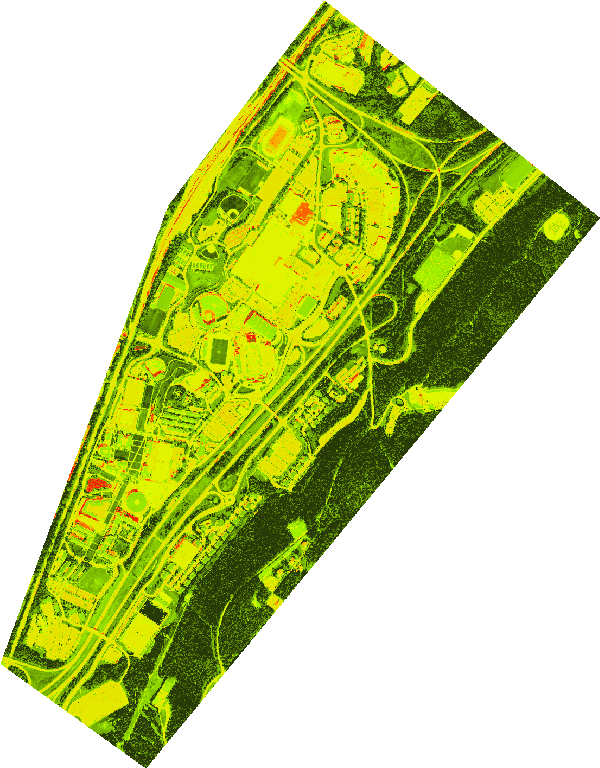

In [8]:
ndvi = calculate_vegetation_index(nir, red)
arcpy.Render(ndvi, rendering_rule={'min': -1, 'max': 1}, colormap='NDVI')

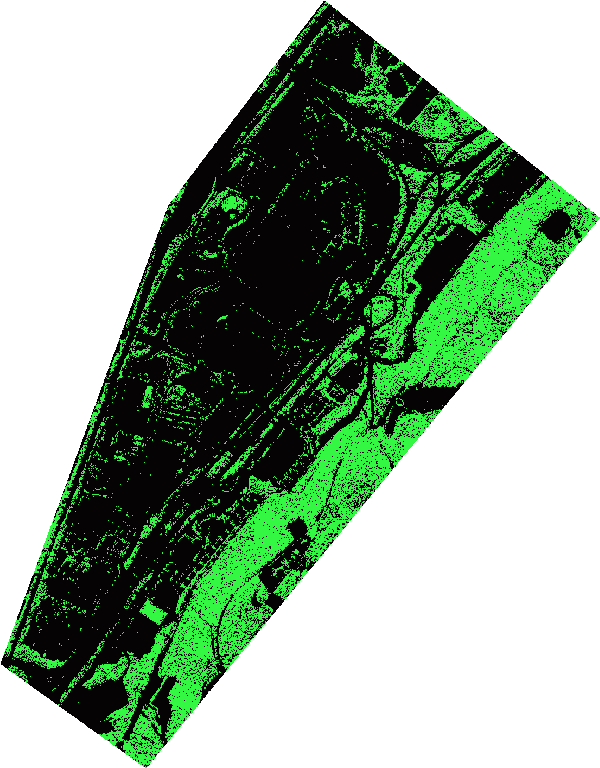

In [17]:
vegetation_mask = ndvi > 0.3
vegetation_mask